In [33]:
# 1. Kutubxonalarni chaqiramiz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Datasetni yuklaymiz
df = pd.read_csv("openpowerlifting.csv")
df.head(100)


,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,Emanuel Moldovan,M,Raw,21.0,Novice,80.29,82.5,NaN,NaN,NaN,75.00,NaN,132.50,207.50,1,141.34
96,1,Bret Lamb,M,Raw,20.0,Open,78.24,82.5,NaN,NaN,NaN,110.00,NaN,NaN,110.00,1,76.18
97,1,Jared Morey,M,Single-ply,36.0,Open,89.90,90,NaN,260.00,NaN,205.00,-305.0,295.00,760.00,1,485.45
98,1,Jared Morey,M,Single-ply,36.0,MPF,89.90,90,NaN,260.00,NaN,205.00,-305.0,295.00,760.00,1,485.45


In [34]:
# 3. Tushib qolgan qiymatlar (Missing Values)
print(df.isnull().sum())

# a) Missing qiymatlarni o‘chirish
df_dropna = df.dropna()

# b) 0 bilan to‘ldirish
df_fill_zero = df.fillna(0)

# c) Raqamli ustunlar uchun o‘rtacha bilan
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].mean(), inplace=True)

# d) Kategorik ustunlar uchun eng ko‘p uchragan qiymat bilan
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# e) Oldingi qiymat bilan
df.fillna(method='ffill', inplace=True)


MeetID                 0
Name                   0
Sex                    0
Equipment              0
Age               239267
Division           15843
BodyweightKg        2402
WeightClassKg       3812
Squat4Kg          385171
BestSquatKg        88343
Bench4Kg          384452
BestBenchKg        30050
Deadlift4Kg       383614
BestDeadliftKg     68567
TotalKg            23177
Place               1092
Wilks              24220
dtype: int64


In [24]:
# 4. 'Unknown' qiymatlarni NaN ga almashtirish
df.replace('Unknown', np.nan, inplace=True)


In [35]:
# 5. Takroriy satrlar (Duplicates)
duplicates = df[df.duplicated()]
print("Takroriy satrlar soni:", len(duplicates))

# O‘chiramiz
df = df.drop_duplicates()


Takroriy satrlar soni: 545


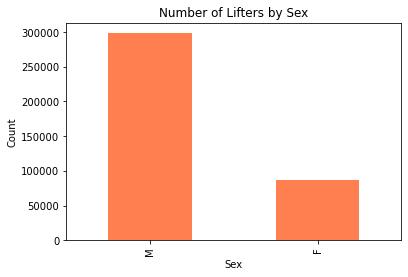

In [37]:
# 6. Matplotlib - Bar chart (agar 'Grade' mavjud bo‘lsa)
plt.figure(figsize=(6,4))
df['Sex'].value_counts().plot(kind='bar', color='coral')
plt.title('Number of Lifters by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()



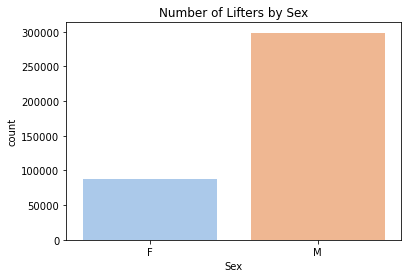

In [38]:
# 7. Seaborn - Histogram (agar 'Score' mavjud bo‘lsa)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', palette='pastel')
plt.title("Number of Lifters by Sex")
plt.show()


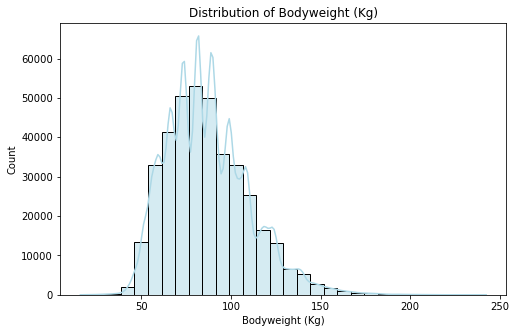

In [42]:
# 8. Seaborn - Barplot (agar Gender va Score mavjud bo‘lsa)
# 8. Seaborn - Barplot (agar 'Sex' va 'TotalKg' mavjud bo‘lsa)
plt.figure(figsize=(8,5))
sns.histplot(df['BodyweightKg'].dropna(), bins=30, kde=True, color='lightblue')
plt.title("Distribution of Bodyweight (Kg)")
plt.xlabel("Bodyweight (Kg)")
plt.show()


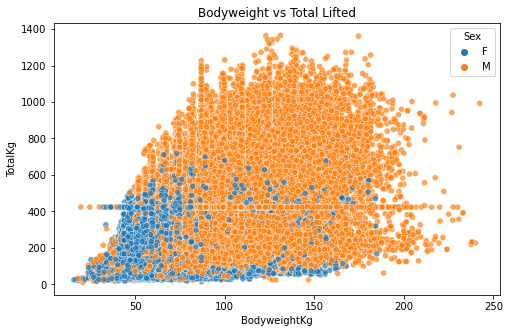

In [44]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='BodyweightKg', y='TotalKg', hue='Sex', alpha=0.7)
plt.title("Bodyweight vs Total Lifted")
plt.show()
